In [1]:
%load_ext autoreload
%autoreload 2

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import matplotlib.pyplot as plt
import jax
from jax import numpy as jnp
from jax import random
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from clu import preprocess_spec, deterministic_data
from ml_collections import config_dict

from src.utils import preprocess as preprocess_utils
from src.utils import plotting as plotting_utils
from src.utils import input as input_utils

from src.transformations.affine import rotate_image, affine_transform_image
from src.transformations.color import color_transform_image, hsv_transform_image
from src.transformations import transform_image, full_transform_image

jax.config.update('jax_platform_name', 'cpu')

/homes/jua23/.virtualenvs/inv/lib/python3.11/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [2]:
rng = random.PRNGKey(0)

I0000 00:00:1709748883.685068 3855740 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.
2024-03-06 18:14:43.725125: E external/xla/xla/stream_executor/cuda/cuda_driver.cc:276] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


## Test a few transformations on MNIST

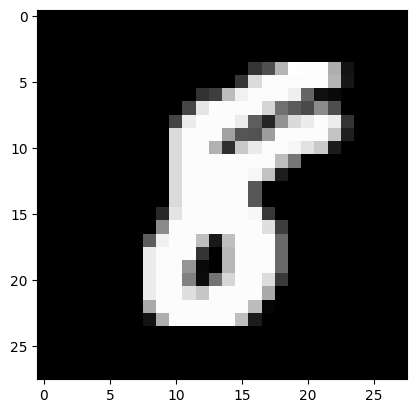

In [3]:
config = config_dict.ConfigDict()
config.dataset = 'mnist'
config.batch_size = 256
config.train_split = 'train'
config.pp_train = f'to_rgb|value_range(-1, 1)|keep(["image"])'
config.val_split = 'test'
config.pp_eval = f'to_rgb|value_range(-1, 1)|keep(["image"])'

ds, _, _ = input_utils.get_data(config, rng)
ds = deterministic_data.start_input_pipeline(ds)

x_og = next(ds)['image'][0, 14]
plt.imshow(plotting_utils.rescale_for_imshow(x_og))

2024-03-06 18:14:46.167277: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


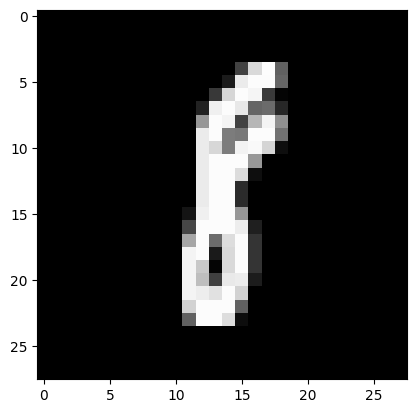

In [4]:
config.pp_train = f'to_rgb|random_zoom({jnp.log(2)}, {jnp.log(2)}, 0., 0.)|value_range(-1, 1)|keep(["image"])'

ds, _, _ = input_utils.get_data(config, rng)
ds = deterministic_data.start_input_pipeline(ds)

x = next(ds)['image'][0, 14]
plt.imshow(plotting_utils.rescale_for_imshow(x))

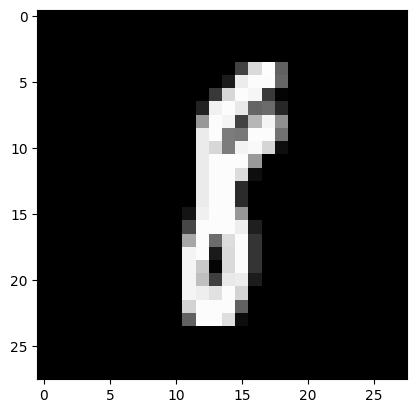

In [5]:
plt.imshow(plotting_utils.rescale_for_imshow(affine_transform_image(x_og, jnp.array([0, 0, 0, jnp.log(2.), 0., 0]), order=1)))

2024-03-06 18:14:47.986869: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


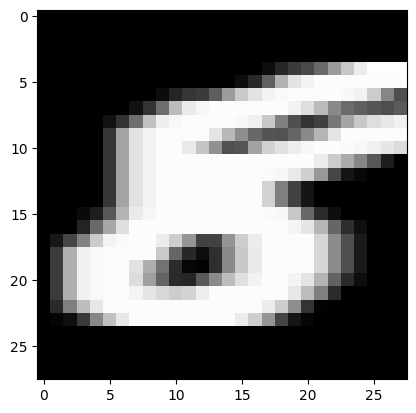

In [6]:
config.pp_train = f'to_rgb|random_zoom({jnp.log(.5)}, {jnp.log(.5)}, 0., 0.)|value_range(-1, 1)|keep(["image"])'

ds, _, _ = input_utils.get_data(config, rng)
ds = deterministic_data.start_input_pipeline(ds)

x = next(ds)['image'][0, 14]
plt.imshow(plotting_utils.rescale_for_imshow(x))

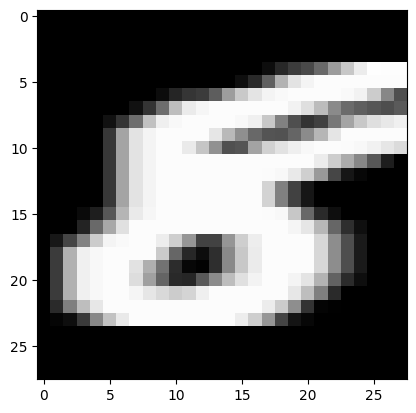

In [7]:
plt.imshow(plotting_utils.rescale_for_imshow(affine_transform_image(x_og, jnp.array([0, 0, 0, jnp.log(0.5), 0., 0, ]), order=1)))

2024-03-06 18:14:49.008309: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


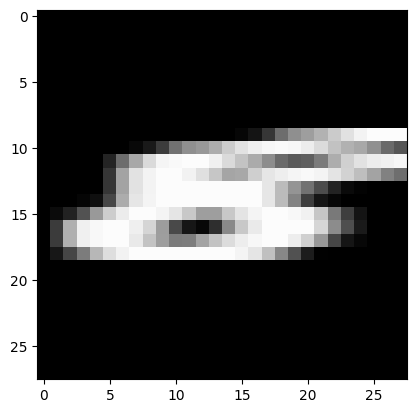

In [8]:
config.pp_train = f'to_rgb|random_zoom({jnp.log(.5)}, {jnp.log(.5)}, {jnp.log(2.)}, {jnp.log(2.)})|value_range(-1, 1)|keep(["image"])'

ds, _, _ = input_utils.get_data(config, rng)
ds = deterministic_data.start_input_pipeline(ds)

x = next(ds)['image'][0, 14]
plt.imshow(plotting_utils.rescale_for_imshow(x))

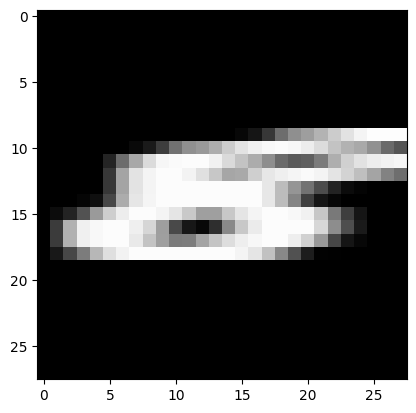

In [9]:
plt.imshow(plotting_utils.rescale_for_imshow(affine_transform_image(x_og, jnp.array([0, 0, 0, jnp.log(.5), jnp.log(2.), 0]), order=1)))

2024-03-06 18:14:50.257013: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


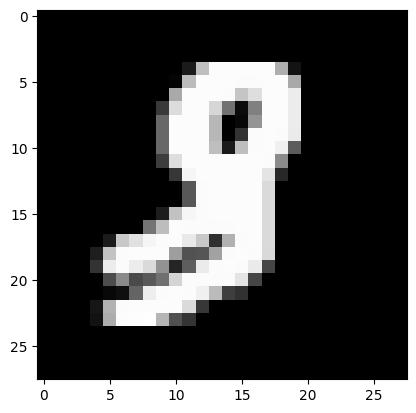

In [10]:
config.pp_train = f'to_rgb|random_rotate(180, 180)|value_range(-1, 1)|keep(["image"])'

ds, _, _ = input_utils.get_data(config, rng)
ds = deterministic_data.start_input_pipeline(ds)

x = next(ds)['image'][0, 14]
plt.imshow(plotting_utils.rescale_for_imshow(x))

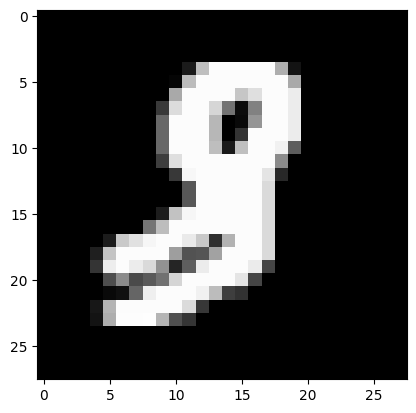

In [11]:
plt.imshow(plotting_utils.rescale_for_imshow(rotate_image(x_og, np.pi, order=1)))

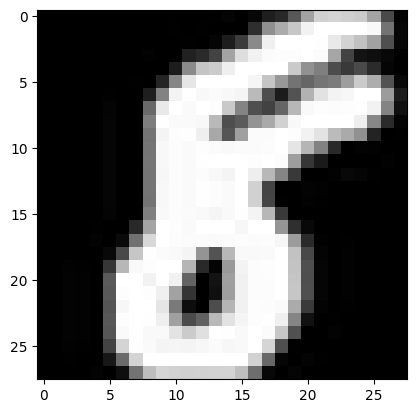

In [12]:
plt.imshow(plotting_utils.rescale_for_imshow(affine_transform_image(x_og, jnp.array([0, 0, 0, -0.33, -0.33, 0]))))

2024-03-06 18:14:55.037227: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


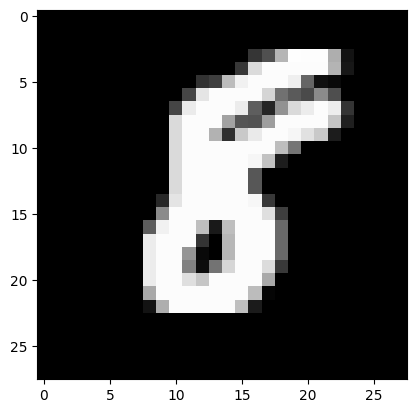

In [13]:
config.pp_train = f'to_rgb|pad(2)|random_crop(28)|value_range(-1, 1)|keep(["image"])'

ds, _, _ = input_utils.get_data(config, rng)
ds = deterministic_data.start_input_pipeline(ds)

x = next(ds)['image'][0, 14]
plt.imshow(plotting_utils.rescale_for_imshow(x))

2024-03-06 18:17:41.556194: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


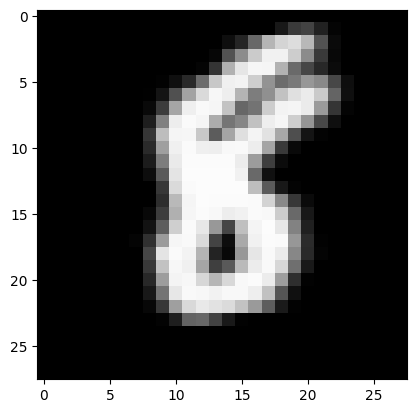

In [24]:
config.pp_train = f'to_rgb|random_rotate(-15, 15)|random_zoom({jnp.log(0.9)},{jnp.log(1.1)},{jnp.log(0.9)},{jnp.log(1.1)})|pad(2)|random_crop(28)|value_range(-1, 1)|keep(["image"])'

ds, _, _ = input_utils.get_data(config, rng)
ds = deterministic_data.start_input_pipeline(ds)

x = next(ds)['image'][0, 14]
plt.imshow(plotting_utils.rescale_for_imshow(x))

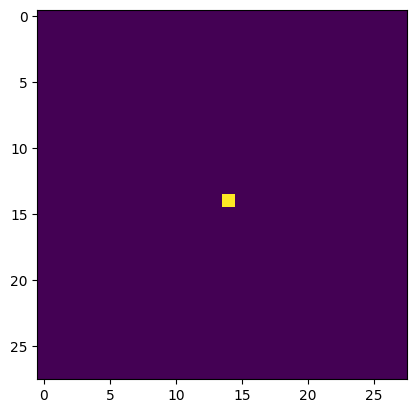

In [13]:
x_tmp = jnp.zeros((28, 28, 1))
x_tmp = x_tmp.at[14, 14, :].set(1.)
plt.imshow(x_tmp)

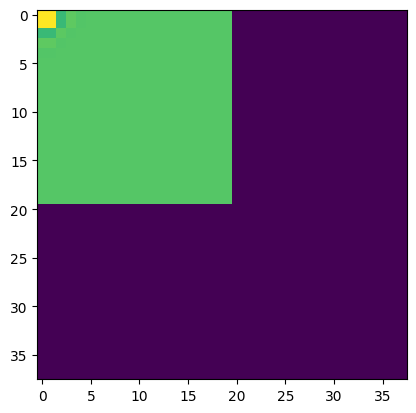

In [14]:
plt.imshow(affine_transform_image(jax.lax.pad(x_tmp, 0., [(5, 5, 0), (5, 5, 0), (0, 0, 0)]), jnp.array([jnp.log(jnp.e), jnp.log(jnp.e), 0, 0, 0, 0])))

## Sanity check for CIFAR10

2024-01-27 21:01:07.929896: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


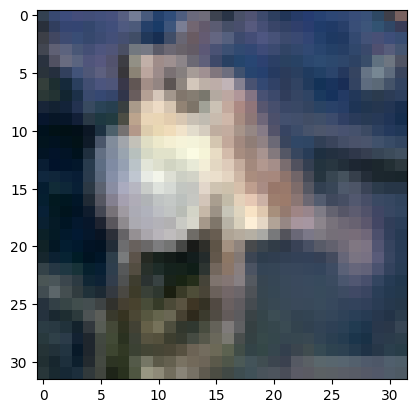

In [15]:
config.dataset = 'cifar10'
config.pp_train = f'value_range(-1, 1)|keep(["image"])'

ds, _, _ = input_utils.get_data(config, rng)
ds = deterministic_data.start_input_pipeline(ds)

x = next(ds)['image'][0, 0]
plt.imshow(plotting_utils.rescale_for_imshow(x))

2024-01-27 21:01:08.754368: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


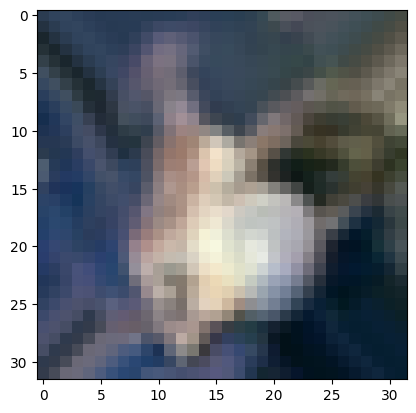

In [16]:
config.pp_train = f'value_range(-1, 1)|random_rotate(135, 135)|keep(["image"])'

ds, _, _ = input_utils.get_data(config, rng)
ds = deterministic_data.start_input_pipeline(ds)

x = next(ds)['image'][0, 0]
plt.imshow(plotting_utils.rescale_for_imshow(x))

## Check that batches are constructed appropriately 

Simulate training data with 1 aug per example

2024-01-27 21:01:09.721798: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


Epoch 1, batch 1


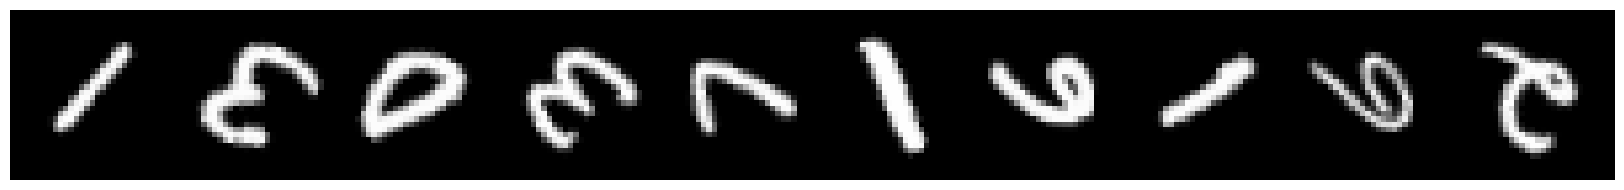

Epoch 1, batch 2


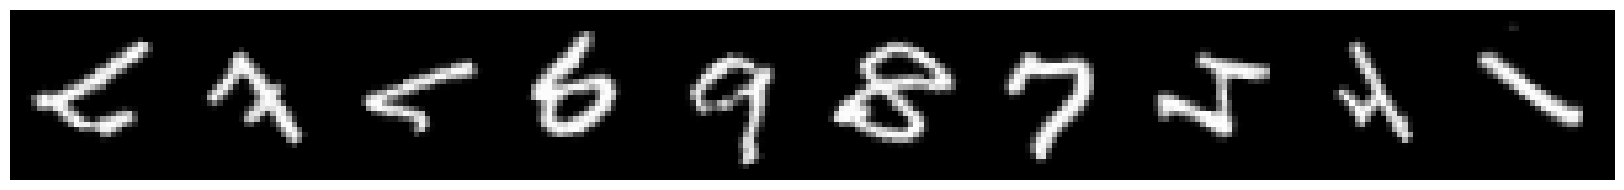

Epoch 2, batch 1


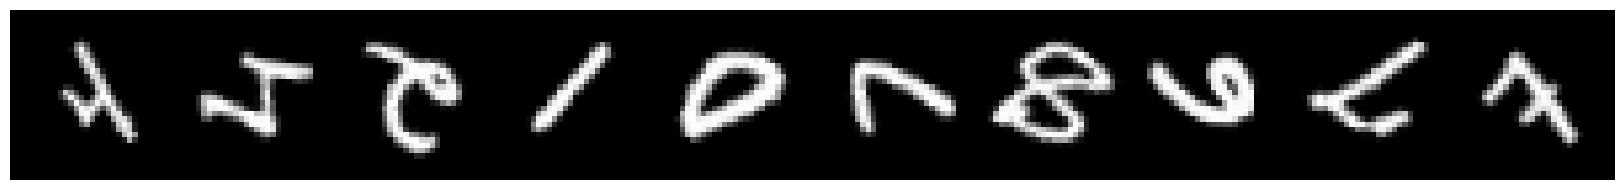

Epoch 2, batch 2


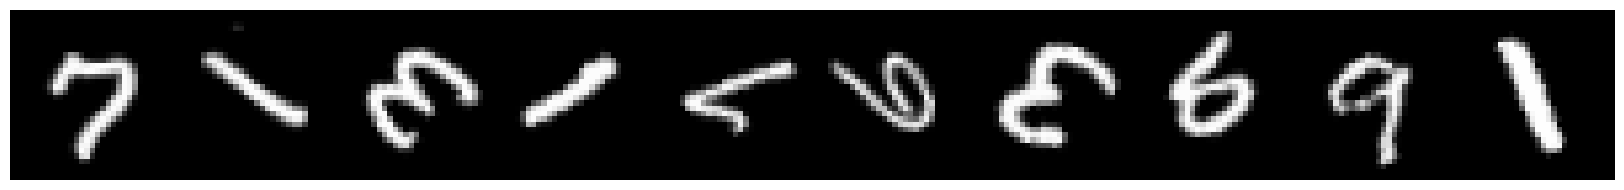

In [17]:
config = config_dict.ConfigDict()
config.dataset = 'mnist'
config.batch_size = 10
config.train_split = 'train[:20]'
config.pp_train = f'value_range(-1, 1)|random_rotate(0, 180)|keep(["image"])'
config.val_split = 'test[:20]'
config.pp_eval = f'value_range(-1, 1)|random_rotate(0, 180)|keep(["image"])'
config.repeat_after_batching = True
# Note: repeat_after_batching must be true. Otherwise, the repeat happens before the preprocessing, which is not what we want.
config.shuffle = "preprocessed"
config.shuffle_buffer_size = 10_000

ds, _, _ = input_utils.get_data(config, rng)
ds = deterministic_data.start_input_pipeline(ds)

print("Epoch 1, batch 1")
xs = next(ds)['image']
plotting_utils.plot_img_array(xs[0]);

print("Epoch 1, batch 2")
xs = next(ds)['image']
plotting_utils.plot_img_array(xs[0]);

print("Epoch 2, batch 1")
xs = next(ds)['image']
plotting_utils.plot_img_array(xs[0]);

print("Epoch 2, batch 2")
xs = next(ds)['image']
plotting_utils.plot_img_array(xs[0]);

Simulate training data with different data augmentations each time

Epoch 1, batch 1


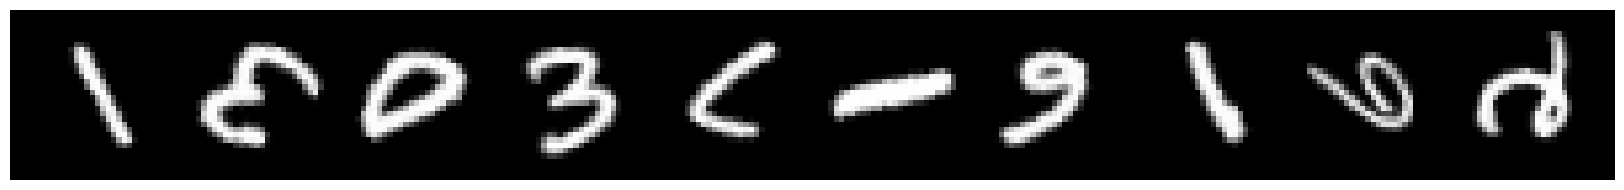

Epoch 1, batch 2


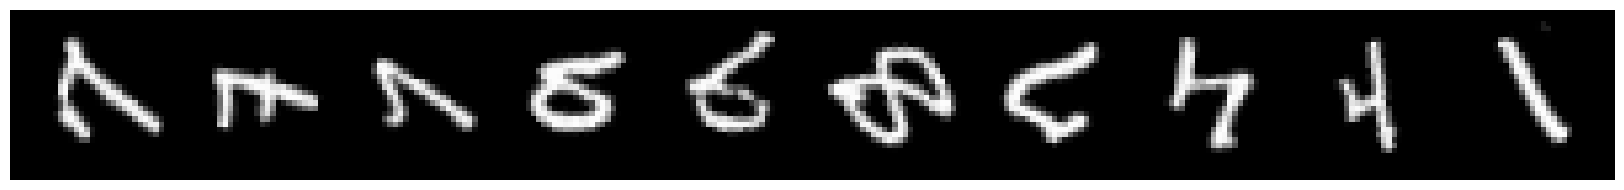

Epoch 2, batch 1


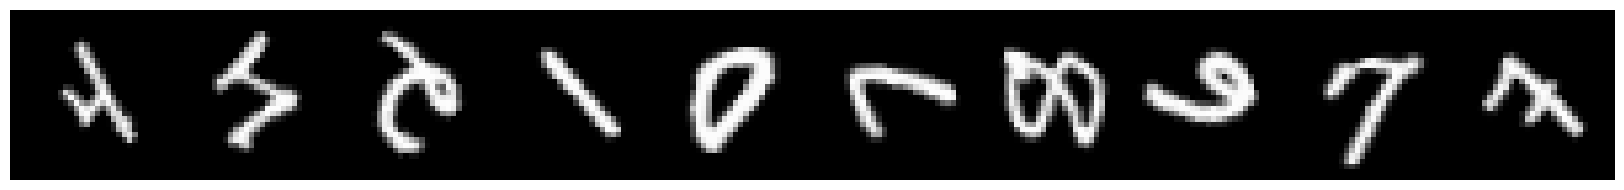

Epoch 2, batch 2


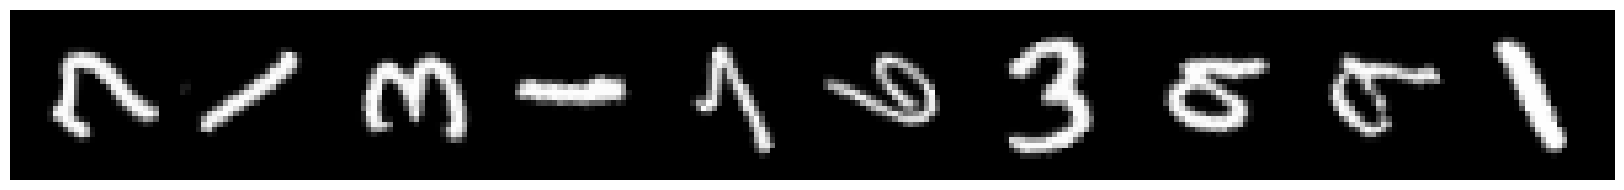

In [18]:
config = config_dict.ConfigDict()
config.dataset = 'mnist'
config.batch_size = 10
config.train_split = 'train[:20]'
config.pp_train = f'value_range(-1, 1)|random_rotate(0, 180)|keep(["image"])'
config.val_split = 'test[:20]'
config.pp_eval = f'value_range(-1, 1)|random_rotate(0, 180)|keep(["image"])'
config.repeat_after_batching = False
# Note: repeat_after_batching must be true. Otherwise, the repeat happens before the preprocessing, which is not what we want.
config.shuffle = "loaded"
config.shuffle_buffer_size = 10_000

ds, _, _ = input_utils.get_data(config, rng)
ds = deterministic_data.start_input_pipeline(ds)

print("Epoch 1, batch 1")
xs = next(ds)['image']
plotting_utils.plot_img_array(xs[0]);

print("Epoch 1, batch 2")
xs = next(ds)['image']
plotting_utils.plot_img_array(xs[0]);

print("Epoch 2, batch 1")
xs = next(ds)['image']
plotting_utils.plot_img_array(xs[0]);

print("Epoch 2, batch 2")
xs = next(ds)['image']
plotting_utils.plot_img_array(xs[0]);

Simulate validation data with 1 augmentation per example

Epoch 1, batch 1


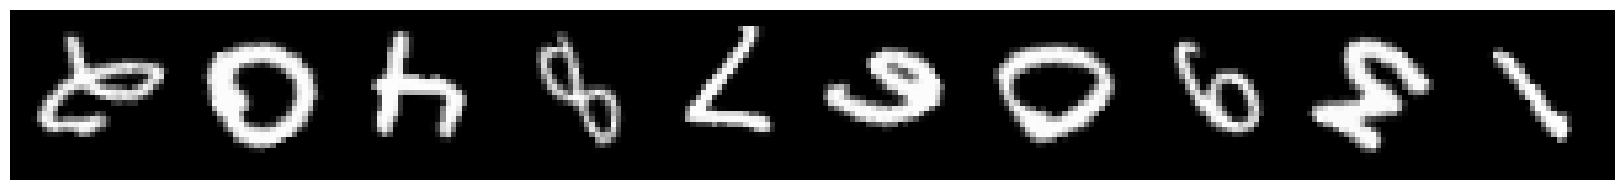

Epoch 1, batch 2


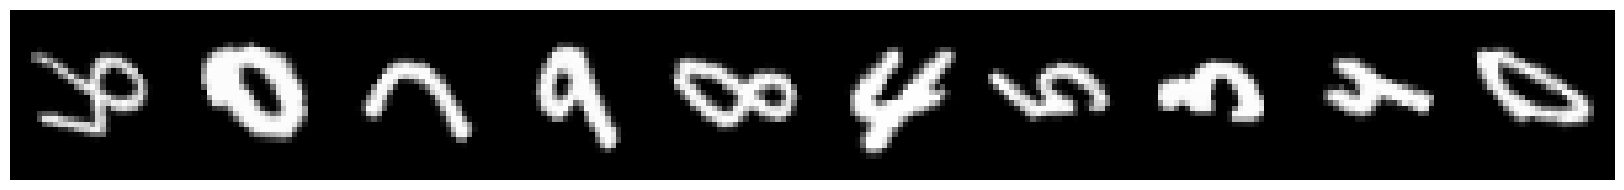

Epoch 2, batch 1
Correctly stopped iteration
Epoch 1, batch 1


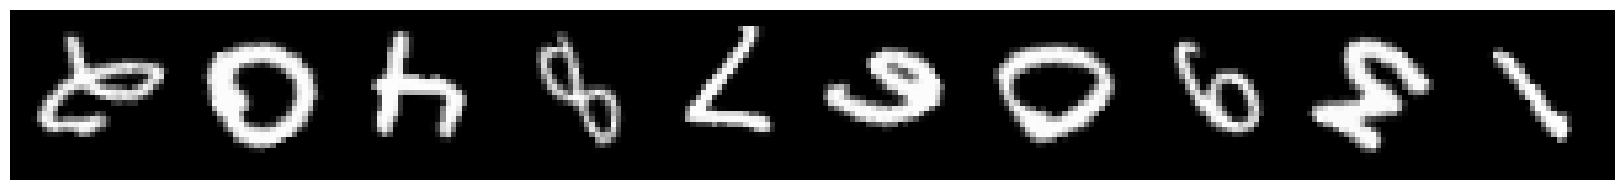

In [19]:
_, ds, _ = input_utils.get_data(config, rng)
ds = deterministic_data.start_input_pipeline(ds)

print("Epoch 1, batch 1")
xs = next(ds)['image']
plotting_utils.plot_img_array(xs[0]);

print("Epoch 1, batch 2")
xs = next(ds)['image']
plotting_utils.plot_img_array(xs[0]);

try:
    print("Epoch 2, batch 1")
    xs = next(ds)['image']
    plotting_utils.plot_img_array(xs[0]);

    print("Epoch 2, batch 2")
    xs = next(ds)['image']
    plotting_utils.plot_img_array(xs[0]);
except StopIteration:
    print("Correctly stopped iteration")

_, ds, _ = input_utils.get_data(config, rng)
ds = deterministic_data.start_input_pipeline(ds)

print("Epoch 1, batch 1")
xs = next(ds)['image']
plotting_utils.plot_img_array(xs[0]);

In [20]:
import tensorflow as tf
dataset = tf.data.Dataset.range(6)
# dataset = dataset.shuffle(3, reshuffle_each_iteration=True)
# dataset = dataset.repeat(2)
dataset = dataset.enumerate()
dataset = dataset.shuffle(3, reshuffle_each_iteration=True)
dataset = dataset.batch(3)
dataset = dataset.repeat(2)
print(list(dataset.as_numpy_iterator()))
print(list(dataset.as_numpy_iterator()))

[(array([2, 0, 1]), array([2, 0, 1])), (array([4, 5, 3]), array([4, 5, 3])), (array([2, 3, 4]), array([2, 3, 4])), (array([1, 5, 0]), array([1, 5, 0]))]
[(array([1, 3, 2]), array([1, 3, 2])), (array([4, 5, 0]), array([4, 5, 0])), (array([2, 0, 1]), array([2, 0, 1])), (array([4, 3, 5]), array([4, 3, 5]))]


## Color Transformations

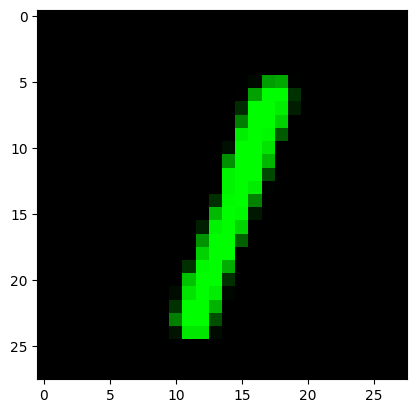

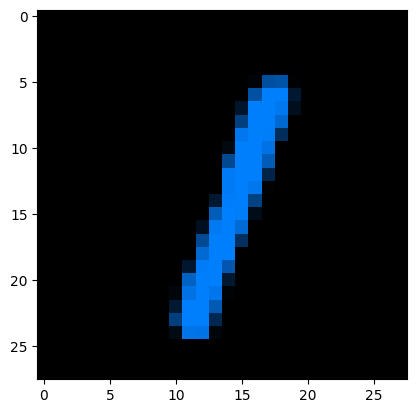

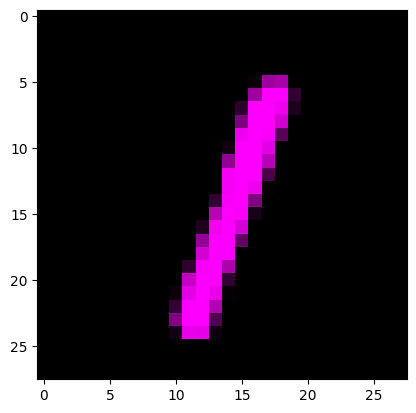

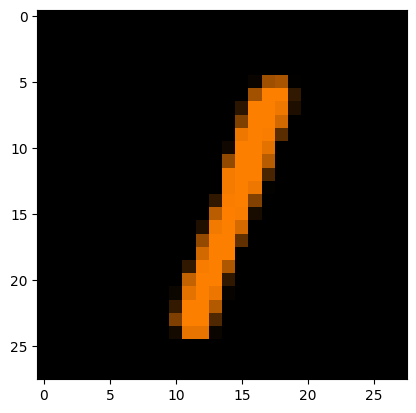

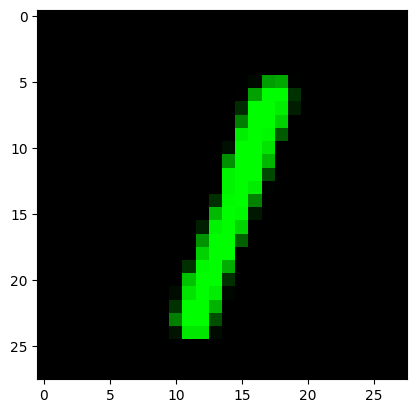

In [21]:
config.pp_train = f'to_rgb(color=1)|value_range(-1, 1)|keep(["image"])'

ds, _, _ = input_utils.get_data(config, rng)
ds = deterministic_data.start_input_pipeline(ds)

xs = next(ds)['image']

for i in np.arange(0, 1.1, 0.25):
  plt.imshow(plotting_utils.rescale_for_imshow(color_transform_image(xs[0, 0], jnp.array([i]))))
  plt.show()

In [22]:
# plt.imshow(plotting_utils.rescale_for_imshow(hsv_transform_image(xs[0, 0], jnp.array([jnp.pi/2, 1.]))))

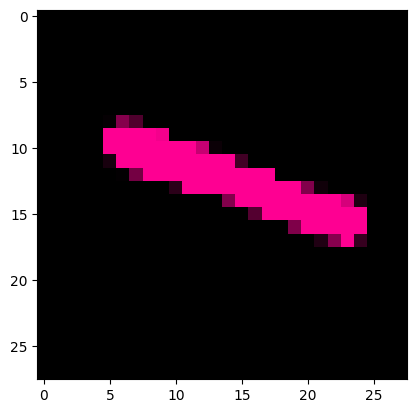

In [23]:
plt.imshow(plotting_utils.rescale_for_imshow(full_transform_image(xs[0, 0], jnp.array([0., 0., jnp.pi/2, 0., .0, 0., jnp.pi/2, 1.]))))

## dSprites

In [24]:
config = config_dict.ConfigDict()
config.dataset = 'aug_dsprites'
config.batch_size = 10
config.train_split = ""  # Doesn't matter for augmentedDsprites
config.val_split = ""  # Doesn't matter for augmentedDsprites

config.pp_train = f'value_range(-1, 1, 0, 1)|move_key("label_shape", "label")|keep(["image", "label"])'
config.pp_eval = f'value_range(-1, 1, 0, 1)|move_key("label_shape", "label")|keep(["image", "mask", "label"])'

config.aug_dsprites = config_dict.ConfigDict()

config.aug_dsprites.square_distribution = config_dict.ConfigDict()
config.aug_dsprites.square_distribution.orientation = (
    f"uniform(low=0.0, high={np.pi * 2})"
)
config.aug_dsprites.square_distribution.scale = (
    "biuniform(low1=0.45, high1=0.55, low2=0.85, high2=0.95)"
)
config.aug_dsprites.square_distribution.x_position = "uniform(low=0.45, high=0.55)"
config.aug_dsprites.square_distribution.y_position = "uniform(low=0.45, high=0.55)"

config.aug_dsprites.ellipse_distribution = config_dict.ConfigDict()
config.aug_dsprites.ellipse_distribution.orientation = (
    f"uniform(low=0.0, high={np.pi / 2})"
)
config.aug_dsprites.ellipse_distribution.scale = (
    "truncated_normal(minval=0.5, maxval=0.85, loc=0.65, scale=0.15)"
)
config.aug_dsprites.ellipse_distribution.x_position = (
    "truncated_normal(minval=0.1, maxval=0.9, loc=0.5, scale=0.25)"
)
config.aug_dsprites.ellipse_distribution.y_position = (
    "truncated_normal(minval=0.35, maxval=0.65, loc=0.5, scale=0.15)"
)

config.aug_dsprites.heart_distribution = config_dict.ConfigDict()
config.aug_dsprites.heart_distribution.orientation = f"delta(value=0.0)"
config.aug_dsprites.heart_distribution.scale = "uniform(low=0.9, high=1.0)"
config.aug_dsprites.heart_distribution.x_position = "uniform(low=0.1, high=0.5)"
config.aug_dsprites.heart_distribution.y_position = (
    "biuniform(low1=0.1, high1=0.3, low2=0.7, high2=0.9)"
)

config.aug_dsprites.heart_distribution.unnormalised_shape_prob = 0.
config.aug_dsprites.square_distribution.unnormalised_shape_prob = 1.
config.aug_dsprites.ellipse_distribution.unnormalised_shape_prob = 0.

In [25]:
ds, _, _ = input_utils.get_data(config, rng)
ds = deterministic_data.start_input_pipeline(ds)

xs = next(ds)['image']

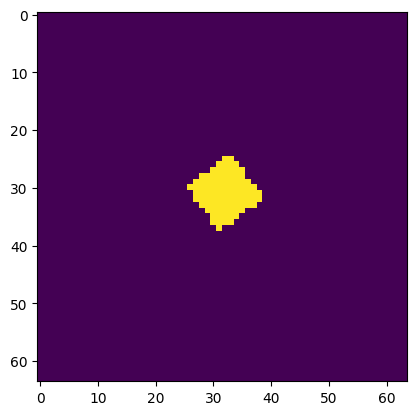

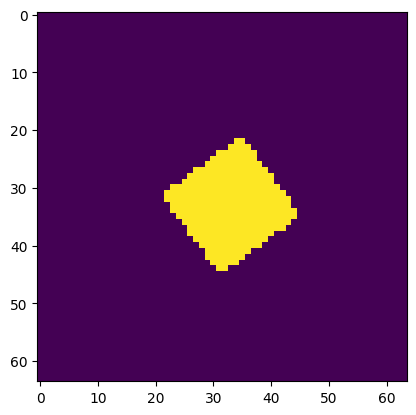

In [26]:
plt.imshow(plotting_utils.rescale_for_imshow(xs[0, 1]))
plt.show()
plt.imshow(plotting_utils.rescale_for_imshow(xs[0, 4]))

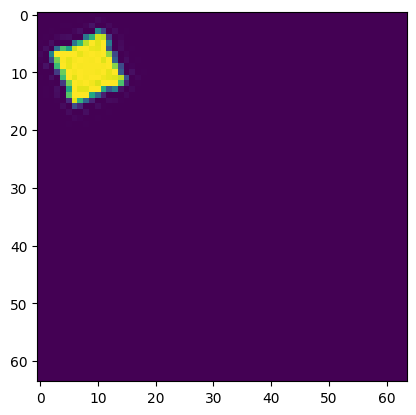

In [27]:
plt.imshow(plotting_utils.rescale_for_imshow(affine_transform_image(xs[0, 0], jnp.array([0.75, 0.75, 0, 0, 0, 0.]))))

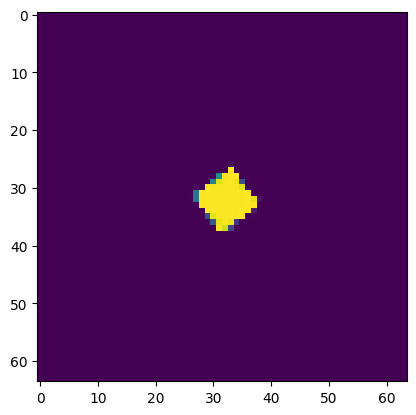

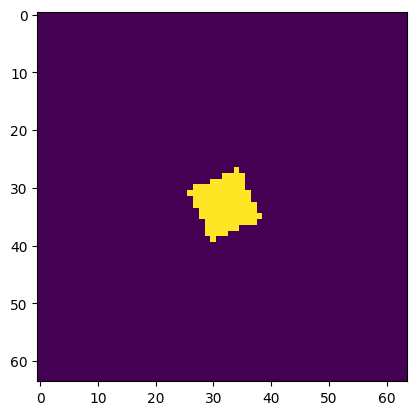

In [28]:
plt.imshow(plotting_utils.rescale_for_imshow(affine_transform_image(xs[0, 4], jnp.array([0., 0., 0, 0.75, 0.75, 0.]))))
plt.show()
plt.imshow(plotting_utils.rescale_for_imshow(xs[0, 0]))

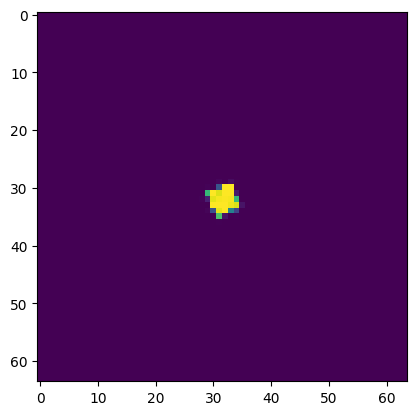

In [29]:
plt.imshow(plotting_utils.rescale_for_imshow(affine_transform_image(xs[0, 0], jnp.array([0., 0., 0, 0.75, 0.75, 0.]))))

In [34]:
active_pixels = ((affine_transform_image(xs[0, 0], jnp.array([0., 0., 0, 0.75, 0.75, 0.])) + 1) / 2).mean()
active_pixels

Array(0.00507642, dtype=float32)

In [37]:
resample_prob = 1 - active_pixels.clip(max=0.005)/0.005

resample_prob

Array(0., dtype=float32)

In [1]:
!pip install imax

  Obtaining dependency information for imax from https://files.pythonhosted.org/packages/30/9b/8319a78708ce3cd78a72a332ba8cb828cda8b58667f8b4ff930659901f17/imax-0.0.1b7-py3-none-any.whl.metadata

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


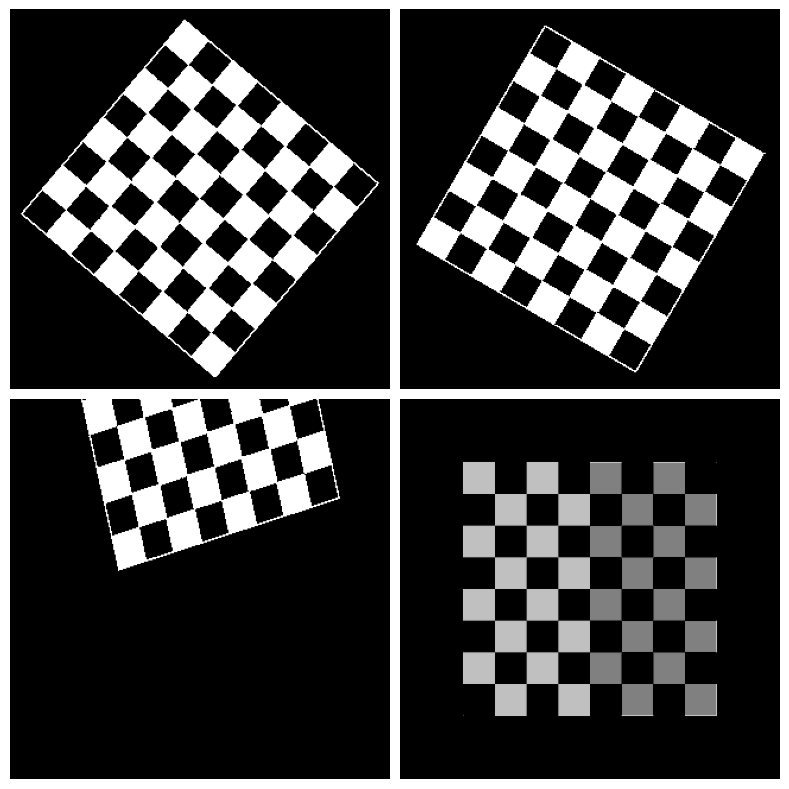

In [28]:
from jax import random
import jax.numpy as jnp
from PIL import Image
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

from imax import transforms, color_transforms, randaugment

# Setup
random_key = random.PRNGKey(32)
random_key, split_key = random.split(random_key)
image = jnp.asarray(Image.open('./checkerboard.png').convert('RGBA')).astype('uint8')

# Geometric transforms:
transform = transforms.rotate(rad=0.7)  # create transformation matrix
transformed_image = transforms.apply_transform(image,    # apply transformation
                                               transform,
                                               mask_value=jnp.array([0, 0, 0, 255]))

# multiple transformations can be combined through matrix multiplication
# this makes multiple sequential transforms much faster
multi_transform = transform @ transform @ transform
multi_transformed_image = transforms.apply_transform(image,
                                                     multi_transform,
                                                     mask_value=-1)


# different affine transformations can be applied
affine_trasform = transforms.rotate(0.26) @ transforms.flip(vertical=True) @ transforms.scale(0.9, 1.1) @ transforms.translate(0., 160.)  #  
affine_transformed_image = transforms.apply_transform(image, affine_trasform, mask_value=jnp.array([0, 0, 0, 255]))                                              

# Color transforms:
adjusted_image = color_transforms.posterize(image, bits=2)

# # Randaugment:
# randomized_image = randaugment.distort_image_with_randaugment(
#     image,
#     num_layers=3,   # number of random augmentations in sequence
#     magnitude=10,   # magnitude of random augmentations
#     random_key=split_key
# )

# Show results:
results = [transformed_image, multi_transformed_image, affine_transformed_image, adjusted_image]
fig = plt.figure(figsize=(10., 10.))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(2, 2),
                 axes_pad=0.1)

for ax, im in zip(grid, results):
    ax.axis('off')
    ax.imshow(im[:, :, :3])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


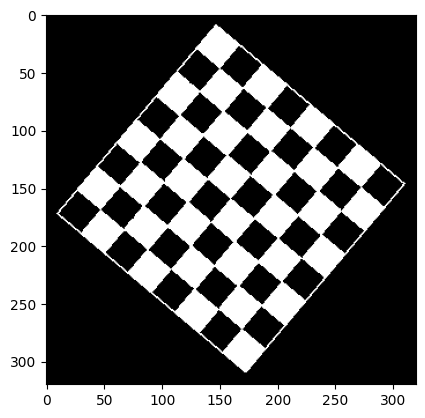

In [27]:
plt.imshow(transformed_image[:, :, :3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


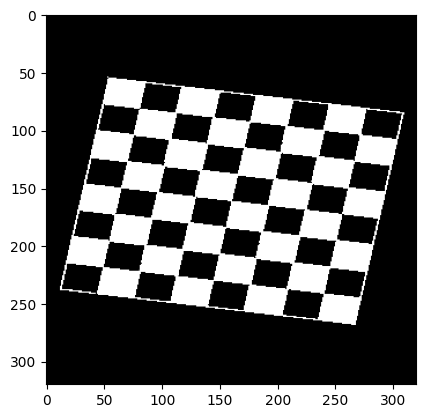

In [43]:
rot_rng, scale_rng, translate_rng = random.split(random.PRNGKey(69), 3)

rot_angle = random.uniform(rot_rng, (), minval=-15, maxval=15)
scale_x, scale_y = random.uniform(scale_rng, (2,), minval=0.5, maxval=1.5)
translate_x, translate_y = random.randint(
    translate_rng, (2,), minval=-20, maxval=20
)

aug = (
    transforms.rotate(rot_angle * jnp.pi / 180.)
    @ transforms.scale(scale_x, scale_y)
    @ transforms.translate(translate_x, translate_y)
)

plt.imshow(transforms.apply_transform(image, aug)[:, :, :3])

In [42]:
rot_angle

Array(9.376446, dtype=float32)